In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import adjusted_rand_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente")

Librerías importadas correctamente


Carga del dataset

In [2]:
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

df = pd.concat([X, y], axis=1)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Ejercicio 1


### 1) (5 ptos) Cargue los datos en un dataframe de Pandas y normalice dichos datos restando la media y dividiendo por la desviación estándar

In [4]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("Datos normalizados:")
print("Corroboramos media 0", np.round(X_normalized.mean(axis=0), 3))
print("Corroboramos una desviacion estandar de 1, y por tanto la varianza 1:", np.round(X_normalized.std(axis=0), 3))
print("Primeras 5 filas de datos normalizados:")
print(X_normalized_df.head())

Datos normalizados:
Corroboramos media 0 [-0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0.]
Corroboramos una desviacion estandar de 1, y por tanto la varianza 1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Primeras 5 filas de datos normalizados:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155

### 2) (15 ptos) Aplique el algoritmo PCA a los datos normalizados para reducir su dimensionalidad a 2. Realice un gráfico de dispersión de los datos obtenidos luego de aplicar PCA, utilizando marcadores de diferentes colores para las diferentes clases

In [5]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

print("Proporcion de la varianza total explicada por cada componente:")
print("PC1:", round(pca.explained_variance_ratio_[0], 4))
print("PC2:", round(pca.explained_variance_ratio_[1], 4))
print("Varianza total explicada:", round(sum(pca.explained_variance_ratio_), 4))

# Crear DataFrame con los datos PCA
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

print("\
Primeras 5 filas después de PCA:")
print(pca_df.head())

Proporcion de la varianza total explicada por cada componente:
PC1: 0.362
PC2: 0.1921
Varianza total explicada: 0.5541
Primeras 5 filas después de PCA:
        PC1       PC2  target
0  3.316751  1.443463       0
1  2.209465 -0.333393       0
2  2.516740  1.031151       0
3  3.757066  2.756372       0
4  1.008908  0.869831       0


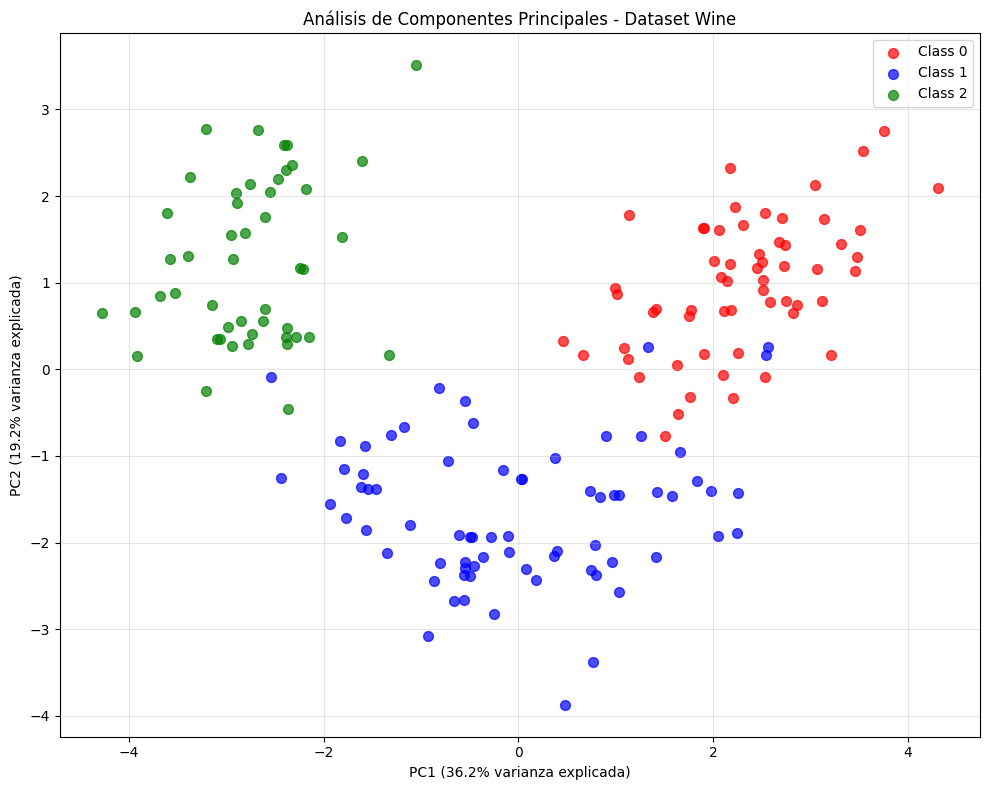

In [6]:
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
target_names = ['Class 0', 'Class 1', 'Class 2']

for i, (color, target_name) in enumerate(zip(colors, target_names)):
    indices = pca_df['target'] == i
    plt.scatter(pca_df.loc[indices, 'PC1'], 
                pca_df.loc[indices, 'PC2'], 
                c=color, 
                label=target_name, 
                alpha=0.7,
                s=50)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza explicada)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza explicada)')
plt.title('Análisis de Componentes Principales - Dataset Wine')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Guardar el gráfico
import random
filename = f'pca_scatter_{random.randint(1000, 9999)}.html'
plt.savefig('temp_plot.png', dpi=150, bbox_inches='tight')
plt.show()

El 55 % de la varianza que determina a que clase pertenece cada vino, es explicada por dos componentes principales.

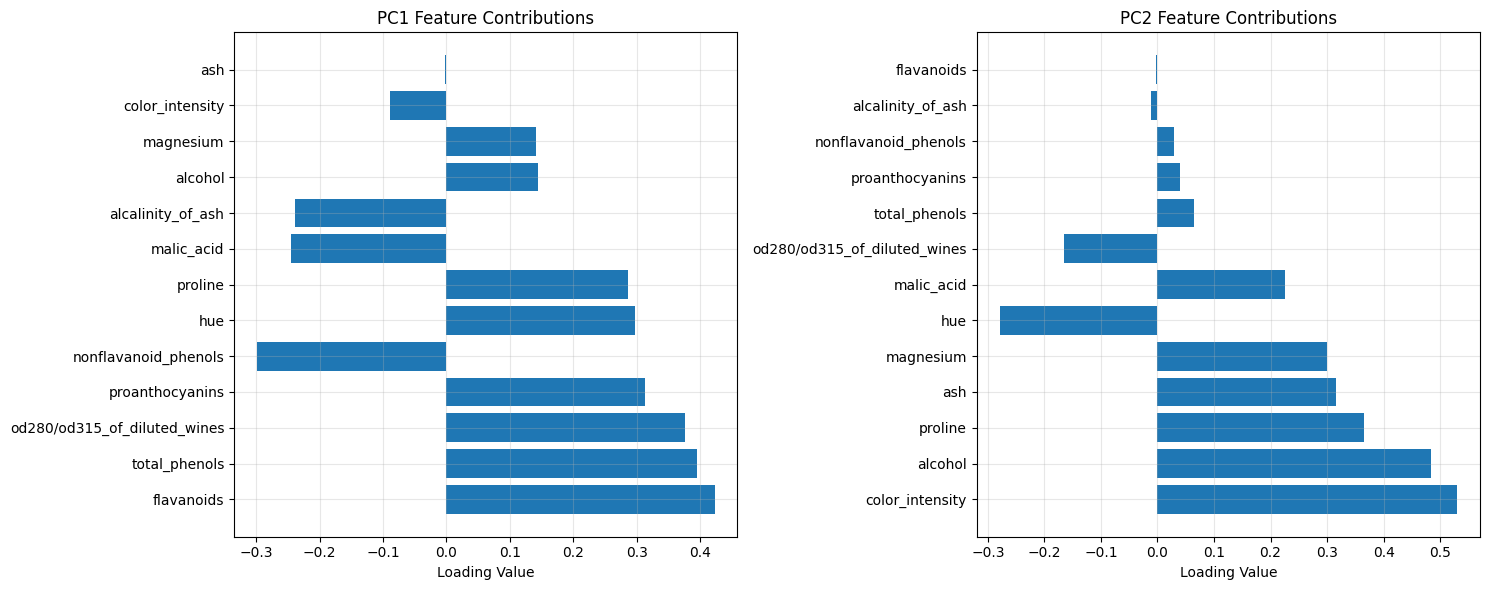

Summary:
PC1 (36.2% varianza): Domnada por flavanoids, total_phenols, densidad optica, antocianinas
PC2 (19.2% variance): Dominada por color_intensity, alcohol, prolina. ceniza y magnesio
\Aqui se muetran las dimensiones que integran cada componente.


In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

features = data.feature_names
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

sorted_idx = np.argsort(np.abs(pc1_loadings))[::-1]

ax1.barh(range(len(features)), pc1_loadings[sorted_idx])
ax1.set_yticks(range(len(features)))
ax1.set_yticklabels([features[i] for i in sorted_idx])
ax1.set_xlabel('Loading Value')
ax1.set_title('PC1 Feature Contributions')
ax1.grid(True, alpha=0.3)

sorted_idx2 = np.argsort(np.abs(pc2_loadings))[::-1]

ax2.barh(range(len(features)), pc2_loadings[sorted_idx2])
ax2.set_yticks(range(len(features)))
ax2.set_yticklabels([features[i] for i in sorted_idx2])
ax2.set_xlabel('Loading Value')
ax2.set_title('PC2 Feature Contributions')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Summary:")
print("PC1 (36.2% varianza): Domnada por flavanoids, total_phenols, densidad optica, antocianinas")
print("PC2 (19.2% variance): Dominada por color_intensity, alcohol, prolina. ceniza y magnesio")
print("\Aqui se muetran las dimensiones que integran cada componente.")

### 3) (5 ptos) Utilice el comando train_test_split para separar el dataset obtenido en el apartado anterior, en conjuntos de entrenamiento y prueba. La fracción de datos de prueba debe estar entre 20% y 30%. 

In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.29, random_state=42, stratify=y
)

print("División del dataset:")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Porcentaje de prueba: {X_test.shape[0]/len(X_pca)*100:.1f}%")

División del dataset:
Entrenamiento: 126 muestras
Prueba: 52 muestras
Porcentaje de prueba: 29.2%


Un porcentaje de entrenamiento del 29% de la data total me dio un mejor desempeño en los siguientes ejercicios. Valores probados: 20,22,25,27,30,29

### 4) (10 ptos) Sin utilizar las etiquetas del dataset, aplique el algoritmo KMeans a los datos de entrenamiento. Considere valores de K (número de clusters) de 2, 3, 4 y 5, y utilice la función adjusted_rand_score para evaluar el desempeño obtenido sobre los datos de prueba, para los diferentes valores de K

In [8]:
print("Ejercicio 4: Evaluación de KMeans con diferentes valores de K")
print("=" * 60)

k_values = [2, 3, 4, 5]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    
    y_pred = kmeans.predict(X_test)
    
    ars = adjusted_rand_score(y_test, y_pred)
    kmeans_results[k] = ars
    
    print(f"K={k}: Adjusted Rand Score = {ars:.4f}")

print(f"\
Mejor K: {max(kmeans_results, key=kmeans_results.get)} con ARS = {max(kmeans_results.values()):.4f}")

Ejercicio 4: Evaluación de KMeans con diferentes valores de K
K=2: Adjusted Rand Score = 0.3494
K=3: Adjusted Rand Score = 0.9367
K=4: Adjusted Rand Score = 0.7826
K=5: Adjusted Rand Score = 0.6413
Mejor K: 3 con ARS = 0.9367


Un mejor desempeño, 0.9367, es obtenido con K = 3. Los vinos, se agrupan mejor en 3 clases o grupos. Como nosotros ya sabemos que solo hay 3 etiquetas, nos da la seguridad de que la data original ya vino correctamente clasificada.

### 5) (10 ptos) Sin utilizar las etiquetas del dataset, aplique el algoritmo de propagación de afinidad sobre los datos de entrenamiento. Utilice la función adjusted_rand_score para evaluar el desempeño obtenido sobre los datos de prueba. La precisión obtenida debe ser mayor o igual al 90%. 

In [9]:
from sklearn.metrics import accuracy_score


af = AffinityPropagation(random_state=42)
af.fit(X_train)

# Predecir en conjunto de prueba
y_pred_af = af.predict(X_test)

# Calcular número de clusters encontrados
n_clusters = len(af.cluster_centers_indices_)
print(f"Número de clusters encontrados: {n_clusters}")

# Para calcular accuracy, necesitamos mapear las etiquetas de cluster a las clases reales
# Usamos la moda de cada cluster para asignar la clase
cluster_to_class = {}
for cluster_id in np.unique(af.labels_):
    mask = af.labels_ == cluster_id
    if np.sum(mask) > 0:
        cluster_to_class[cluster_id] = stats.mode(y_train[mask], keepdims=True)[0][0]

# Mapear predicciones de cluster a clases
y_pred_mapped = np.array([cluster_to_class.get(pred, -1) for pred in y_pred_af])

accuracy = accuracy_score(y_test, y_pred_mapped)
ars_af = adjusted_rand_score(y_test, y_pred_af)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f"Adjusted Rand Score: {ars_af:.4f}")

if accuracy >= 0.9:
    print("Affinity Propagation logró una precisión ≥90%")
else:
    print("Affinity Propagation no alcanzó el 90% de precisión")
    
print(f"KMeans (K=3) obtuvo ARS={kmeans_results[3]:.4f}, mientras que Affinity Propagation obtuvo ARS={ars_af:.4f}")
if kmeans_results[3] > ars_af:
    print("KMeans con K=3 tuvo mejor rendimiento que Affinity Propagation")
else:
    print("Affinity Propagation tuvo mejor rendimiento que KMeans")

Número de clusters encontrados: 7
Accuracy: 0.9423 (94.2%)
Adjusted Rand Score: 0.4272
Affinity Propagation logró una precisión ≥90%
KMeans (K=3) obtuvo ARS=0.9367, mientras que Affinity Propagation obtuvo ARS=0.4272
KMeans con K=3 tuvo mejor rendimiento que Affinity Propagation


### 6) (5 ptos) Comente brevemente sobre los resultados obtenidos 


Los resultados indican que los vinos estudiados bajo 13 caracteristicas se agrupan mejor en 3 clases distintas. 

Esto es corroborado por KMeans donde K = 3 tiene una afinidad del 0.9367 y un ARS de 0.93. El cual es superior al numero de clusters (7) generados por propagacion de afinindad, cuyo ARS es de 0.42. 

Aqui se demuestra porque se deben usar varios algoritmos para analizar la data. Con Kmeans explicitamente indicamos que K probar, y con 3 fue un exito. Tal como lo muestra la data original ya clasificada. Mientras que propagacion de afinidad, que busca el K ideal como resultado del algoritmo, no dio un buen resultado: 7.

Por ultimo, ambos algoritmos se realizaron sobre los PC1 y PC2 del PCA. Pues ambos componentes explican el 55% de la varianza en los vinos. De esta manera simplificamos el analisis reduciendo las dimensiones de 13 a 2.

Graficos para comparar: Data original, Kmeans y propagacion de afinidad

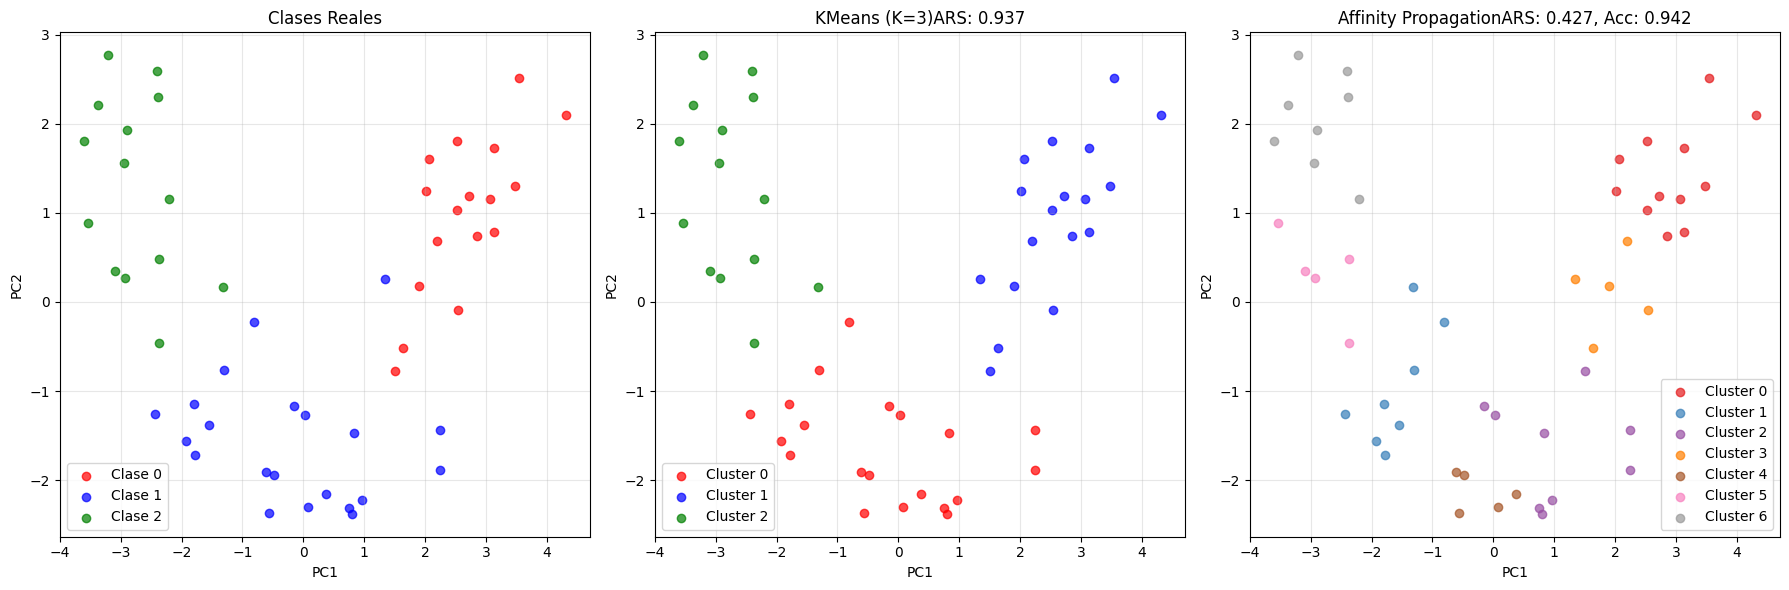

Resumen final de resultados:
Dataset: 178 muestras, 2 componentes principales
Varianza explicada por PCA: 55.4%
División: 126 entrenamiento, 52 prueba
Resultados de clustering:
• KMeans (K=3): ARS = 0.9367 (mejor K)
• Affinity Propagation: ARS = 0.4272, Accuracy = 94.2%
• Affinity Propagation encontró 7 clusters automáticamente


In [13]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

kmeans_best = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_best.fit(X_train)
y_pred_kmeans = kmeans_best.predict(X_test)

colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
    mask = y_test == i
    axes[0].scatter(X_test[mask, 0], X_test[mask, 1], c=color, label=f'Clase {i}', alpha=0.7)
axes[0].set_title('Clases Reales')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for i, color in enumerate(colors):
    mask = y_pred_kmeans == i
    axes[1].scatter(X_test[mask, 0], X_test[mask, 1], c=color, label=f'Cluster {i}', alpha=0.7)
axes[1].set_title(f'KMeans (K=3)\
ARS: {kmeans_results[3]:.3f}')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

unique_clusters = np.unique(y_pred_af)
colors_af = plt.cm.Set1(np.linspace(0, 1, len(unique_clusters)))
for i, (cluster, color) in enumerate(zip(unique_clusters, colors_af)):
    mask = y_pred_af == cluster
    axes[2].scatter(X_test[mask, 0], X_test[mask, 1], c=[color], label=f'Cluster {cluster}', alpha=0.7)
axes[2].set_title(f'Affinity Propagation\
ARS: {ars_af:.3f}, Acc: {accuracy:.3f}')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Resumen final de resultados:")
print("=" * 50)
print(f"Dataset: {X_pca.shape[0]} muestras, {X_pca.shape[1]} componentes principales")
print(f"Varianza explicada por PCA: {sum(pca.explained_variance_ratio_):.1%}")
print(f"División: {X_train.shape[0]} entrenamiento, {X_test.shape[0]} prueba")
print("\
Resultados de clustering:")
print(f"• KMeans (K=3): ARS = {kmeans_results[3]:.4f} (mejor K)")
print(f"• Affinity Propagation: ARS = {ars_af:.4f}, Accuracy = {accuracy:.1%}")
print(f"• Affinity Propagation encontró {n_clusters} clusters automáticamente")